In [30]:
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report


In [31]:
df = pd.read_csv("data_perfect_final.csv", header=0)
df.shape

(14138, 58)

In [32]:
df.describe()

,Unnamed: 0,funding_rounds,funding_total_usd,milestones,relationships,PopulationEstimate-2013,PopulationGrowth,private_eq,crowd_eq,Round_1_amount,...,mobile,advertising,ecommerce,analytics,games_video,cleantech,other_category,age,funding_velocity,day_since_last_funding
count,14138.000000,14138.000000,1.413800e+04,14138.000000,14138.000000,1.413800e+04,14138.000000,1.413800e+04,1.413800e+04,1.413800e+04,...,14138.000000,14138.000000,14138.000000,14138.000000,14138.000000,14138.000000,14138.000000,14138.000000,1.413800e+04,14138.000000
mean,33456.864054,1.846937,1.222230e+07,0.993846,5.296991,1.130872e+06,0.002544,7.644103e+05,9.982317e+03,3.911994e+05,...,0.075683,0.045834,0.055666,0.028080,0.044844,0.029000,0.332296,5.535829,2.198502e+06,798.423044
std,17843.143628,1.335039,4.980127e+07,1.032282,5.344202,1.931142e+06,0.246015,2.307082e+07,3.493765e+05,1.499522e+06,...,0.264499,0.209132,0.229283,0.165208,0.206968,0.167812,0.471053,3.497065,2.289205e+07,785.291606
min,0.000000,1.000000,2.910000e+02,0.000000,1.000000,9.000000e+00,-0.959835,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046575,6.344982e+01,19.000000
25%,19145.250000,1.000000,3.750000e+05,0.000000,2.000000,8.750800e+04,0.002502,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.915068,1.000000e+05,224.000000
50%,34413.500000,1.000000,1.800000e+06,1.000000,4.000000,6.918830e+05,0.021068,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.838356,4.269092e+05,548.000000
75%,48049.750000,2.000000,9.000000e+06,2.000000,6.000000,1.131268e+06,0.042568,0.000000e+00,0.000000e+00,3.000000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.002740,1.590235e+06,1086.000000
max,64645.000000,15.000000,2.600000e+09,9.000000,80.000000,8.398739e+06,7.050796,2.600000e+09,2.700000e+07,1.051111e+08,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.008219,2.573718e+09,10908.000000


In [33]:
#drop the variables for the model to converge 
df=df.drop(['Unnamed: 0','dropout_fg','funding_velocity','normalized_name','venture_capital_fg','private_eq_fg','crowd_eq_fg','round1_fg','round2_fg','round3_fg','round4_fg','round5_fg','round6_fg'],axis = 1)

In [34]:
from sklearn.preprocessing import MinMaxScaler
#from sklearn import preprocessing
minmaxScaler = preprocessing.MinMaxScaler() 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14138 entries, 0 to 14137
Data columns (total 45 columns):
funding_rounds               14138 non-null float64
funding_total_usd            14138 non-null float64
milestones                   14138 non-null float64
relationships                14138 non-null float64
PopulationEstimate-2013      14138 non-null float64
PopulationGrowth             14138 non-null float64
private_eq                   14138 non-null float64
crowd_eq                     14138 non-null float64
Round_1_amount               14138 non-null float64
Round_2_amount               14138 non-null float64
Round_3_amount               14138 non-null float64
Round_4_amount               14138 non-null float64
Round_5_amount               14138 non-null float64
Round_6_amount               14138 non-null float64
Venture_Capital              14138 non-null float64
investor_participants        14138 non-null float64
FounderCounter               14138 non-null float64
C_Level

In [36]:
#minmax scaling the variables with large values 
df1=minmaxScaler.fit_transform(df[['Round_1_amount','Round_2_amount','Round_3_amount','Round_4_amount','Round_5_amount','Round_6_amount',\
                              'funding_total_usd','PopulationEstimate-2013','age','private_eq','Venture_Capital','crowd_eq']])
df2=pd.DataFrame(df1,columns=['Round_1_amount','Round_2_amount','Round_3_amount','Round_4_amount','Round_5_amount','Round_6_amount',\
                              'funding_total_usd','PopulationEstimate-2013','age','private_eq','Venture_Capital','crowd_eq'])
df1=df.drop(['Round_1_amount','Round_2_amount','Round_3_amount','Round_4_amount','Round_5_amount','Round_6_amount',\
                              'funding_total_usd','PopulationEstimate-2013','age','private_eq','Venture_Capital','crowd_eq'],axis=1)
dff=pd.concat([df1,df2],axis=1)

In [37]:
#reduce dimension 
dff['city_ranked_top_ten_city']=dff['city_ranked_top_ten_city']*2
dff['city_ranked']=dff['city_ranked_top_ten_city']+dff['city_ranked_top_five_city']
#software lable=1
dff['biotech']=dff['biotech']*2
dff['enterprise']=dff['enterprise']*3
dff['web']=dff['web']*4
dff['mobile']=dff['mobile']*5
dff['advertising']=dff['advertising']*6
dff['ecommerce']=dff['ecommerce']*7
dff['analytics']=dff['analytics']*8
dff['cleantech']=dff['cleantech']*9
dff['games_video']=dff['games_video']*10
dff['profession']=dff['software']+dff['biotech']+dff['enterprise']+dff['web']+dff['mobile']+dff['advertising']+dff['ecommerce']+dff['analytics']\
+dff['cleantech']+dff['games_video']

In [38]:
dff=dff.drop(['city_ranked_other_city','city_ranked_top_five_city','city_ranked_top_ten_city','cleantech','other_category','analytics','games_video',\
'ecommerce','advertising','mobile','web','software','enterprise','biotech'],axis=1)

In [39]:
dff=dff.drop(['round1_missing_fg','round2_missing_fg','round3_missing_fg','round4_missing_fg','round5_missing_fg'],axis=1)

In [40]:
dff.shape

(14138, 28)

In [41]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14138 entries, 0 to 14137
Data columns (total 28 columns):
funding_rounds             14138 non-null float64
milestones                 14138 non-null float64
relationships              14138 non-null float64
PopulationGrowth           14138 non-null float64
investor_participants      14138 non-null float64
FounderCounter             14138 non-null float64
C_Level_Counter            14138 non-null float64
school_counter             14138 non-null float64
count_degrees              14138 non-null float64
female_fg                  14138 non-null float64
MBA_fg                     14138 non-null float64
state_ranked               14138 non-null int64
success                    14138 non-null int64
day_since_last_funding     14138 non-null float64
Round_1_amount             14138 non-null float64
Round_2_amount             14138 non-null float64
Round_3_amount             14138 non-null float64
Round_4_amount             14138 non-null flo

In [42]:
len(dff)

14138

In [43]:
#regression
import statsmodels.api as sm
from scipy import stats
xx=dff.drop('success',axis=1)
yy=dff['success']
xx = sm.add_constant(xx)
resulteLogit= sm.Logit(yy, xx).fit()
resulteLogit.summary()

/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


         Current function value: 0.481813
         Iterations: 35


/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                14138
Model:                          Logit   Df Residuals:                    14111
Method:                           MLE   Df Model:                           26
Date:                Wed, 29 Apr 2020   Pseudo R-squ.:                 0.09317
Time:                        16:31:17   Log-Likelihood:                -6811.9
converged:                      False   LL-Null:                       -7511.7
Covariance Type:            nonrobust   LLR p-value:                3.275e-279
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.4316      7.815     -0.311      0.756     -17.749      12.886
funding_rounds              0.0446      0.019      2.354      0.019       0.007       0.082
milestones                  0.1668      0.024      7.084      0.000       0.121       0.213
relationships               0.0229      0.006      3.912      0.000       0.011       0.034
PopulationGrowth           -0.1004      0.104     -0.966      0.334      -0.304       0.103
investor_participants       0.0204      0.008      2.415      0.016       0.004       0.037
FounderCounter              0.0065      0.009      0.736      0.462      -0.011       0.024
C_Level_Counter             0.0548      0.013      4.126      0.000       0.029       0.081
school_counter              0.0276      0.028      0.979      0.328      -0.028       0.083
count_degrees              -0.0445      0.015     -3.001      0.003      -0.074      -0.015
female_fg                  -0.1169      0.075     -1.556      0.120      -0.264       0.030
MBA_fg                      0.2678      0.075      3.595      0.000       0.122       0.414
state_ranked                0.1435      0.048      3.007      0.003       0.050       0.237
day_since_last_funding     -0.0003   3.39e-05     -7.702      0.000      -0.000      -0.000
Round_1_amount              1.0942   2.82e+06   3.88e-07      1.000   -5.53e+06    5.53e+06
Round_2_amount              7.9771   1.07e+07   7.43e-07      1.000   -2.11e+07    2.11e+07
Round_3_amount              4.4745   6.71e+06   6.66e-07      1.000   -1.32e+07    1.32e+07
Round_4_amount              0.9464   6.93e+06   1.37e-07      1.000   -1.36e+07    1.36e+07
Round_5_amount             -0.2856   2.04e+07   -1.4e-08      1.000      -4e+07       4e+07
Round_6_amount             -0.8989   6.45e+07  -1.39e-08      1.000   -1.26e+08    1.26e+08
funding_total_usd           1.0512   6.98e+07   1.51e-08      1.000   -1.37e+08    1.37e+08
PopulationEstimate-2013    -0.1929      0.103     -1.864      0.062      -0.396       0.010
age                         1.6067      0.102     15.712      0.000       1.406       1.807
private_eq                 -0.8183   6.98e+07  -1.17e-08      1.000   -1.37e+08    1.37e+08
Venture_Capital             3.1256   2.28e+07   1.37e-07      1.000   -4.47e+07    4.47e+07
crowd_eq                   -2.8802   7.25e+05  -3.97e-06      1.000   -1.42e+06    1.42e+06
city_ranked                 0.1996      0.045      4.473      0.000       0.112       0.287
profession                  0.0078      0.007      1.092      0.275      -0.006       0.022
===========================================================================================
"""

/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


<function matplotlib.pyplot.show(*args, **kw)>

/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


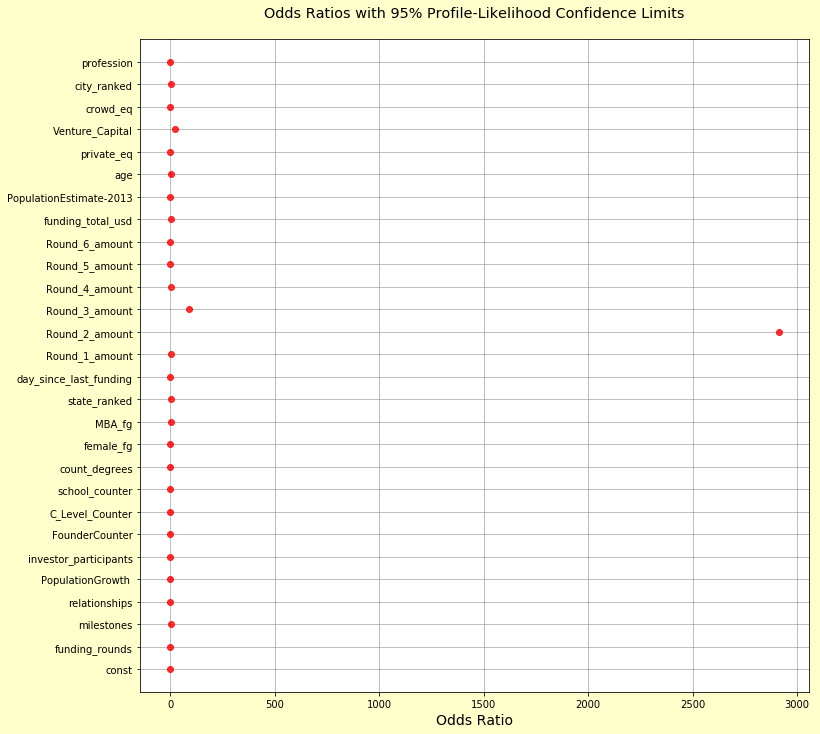

In [44]:
#resulteLogit  OR
params =resulteLogit.params
conf =resulteLogit.conf_int()
conf['OR'] = params
conf=conf.dropna()
conf=np.exp(conf)
conf.columns = ['2.5%', '97.5%', 'OR']
plt.figure(figsize=(12,12),facecolor='#ffffcc',edgecolor='#ffffcc') #size of the frame 
plt.title('Odds Ratios with 95% Profile-Likelihood Confidence Limits\n',fontsize='x-large' )
yl=len(conf)
plt.ylim(0,yl+1) #scope of y 
y=np.arange(1,yl+1)
plt.yticks(y,conf.index) 
plt.xlabel(u'Odds Ratio',fontproperties='SimHei',fontsize=14)
plt.grid( color='grey', linewidth=0.5)
x=conf['OR'] 
plt.errorbar(x=conf['OR'],y=y,xerr=conf['2.5%'],alpha=0.8, color='red',fmt='o')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

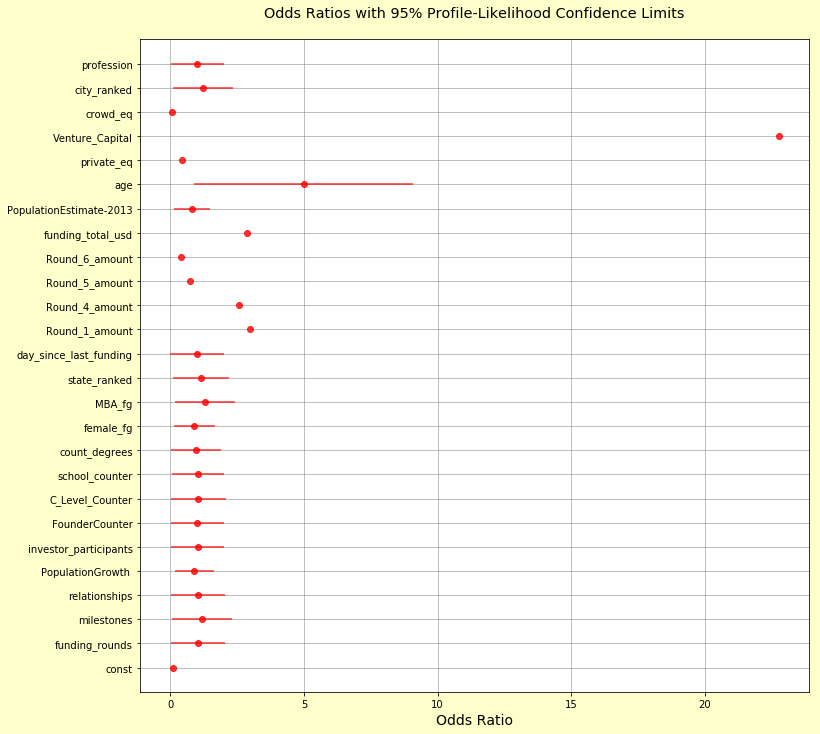

In [47]:
#not showing round 2 and round 3 amount 
plt.figure(figsize=(12,12),facecolor='#ffffcc',edgecolor='#ffffcc') 
plt.title('Odds Ratios with 95% Profile-Likelihood Confidence Limits\n',fontsize='x-large' )
conf1=conf.drop(['Round_2_amount','Round_3_amount'])
yl=len(conf1)
plt.ylim(0,yl+1) #
y=np.arange(1,yl+1)
plt.yticks(y,conf1.index) 
plt.xlabel(u'Odds Ratio',fontproperties='SimHei',fontsize=14)
x=conf['OR'] 
plt.grid( color='grey', linewidth=0.5)
plt.errorbar(x=conf1['OR'],y=y,xerr=conf1['2.5%'],alpha=0.8, color='red',fmt='o')
plt.show

In [48]:
from imblearn.over_sampling import RandomOverSampler
x_train, x_test, y_train, y_test = train_test_split(dff.drop('success',axis=1), 
                                                    dff['success'], test_size=0.30, 
                                                    random_state=50)
model_RandomOverSampler=RandomOverSampler(random_state=12345)  
x_train,y_train=model_RandomOverSampler.fit_sample(x_train,y_train)   


Using TensorFlow backend.
/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/lianxinyu/opt/anaconda3/l

In [49]:
logmodel = LogisticRegression(class_weight={1:0.49,0:0.51})
#logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      3273
           1       0.40      0.54      0.45       969

    accuracy                           0.71      4242
   macro avg       0.62      0.65      0.63      4242
weighted avg       0.74      0.71      0.72      4242



/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
from sklearn.metrics import confusion_matrix,classification_report
c2=confusion_matrix(y_test, predictions,labels=[1,0])
c2

array([[ 519,  450],
       [ 794, 2479]])

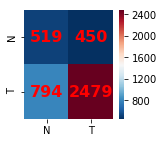

In [51]:
import seaborn as sns
sns.set_context({"figure.figsize":(2,2)})
sns.heatmap(c2,annot=True,annot_kws={'size':16,'weight':'bold', 'color':'red'},fmt='d',xticklabels=('N','T'), yticklabels=('N','T'),\
           cmap="RdBu_r")

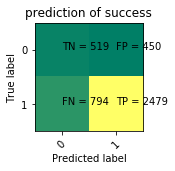

In [52]:
plt.clf()
plt.imshow(c2, interpolation='nearest', cmap=plt.cm.summer)
classNames = ['0','1']
plt.title('prediction of success')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(c2[i][j]))
plt.show()

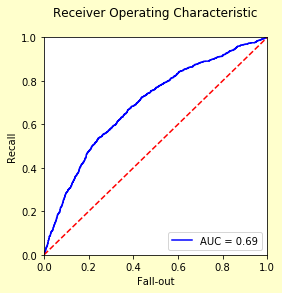

In [53]:
from sklearn.metrics import roc_curve,auc
# LogisticRegression ROC graph 
plt.figure(figsize=(4,4),facecolor='#ffffcc',edgecolor='#ffffcc')
predictions=logmodel.predict_proba(x_test)
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:
, 1])
roc_auc=auc(false_positive_rate,recall)
plt.title('Receiver Operating Characteristic\n')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

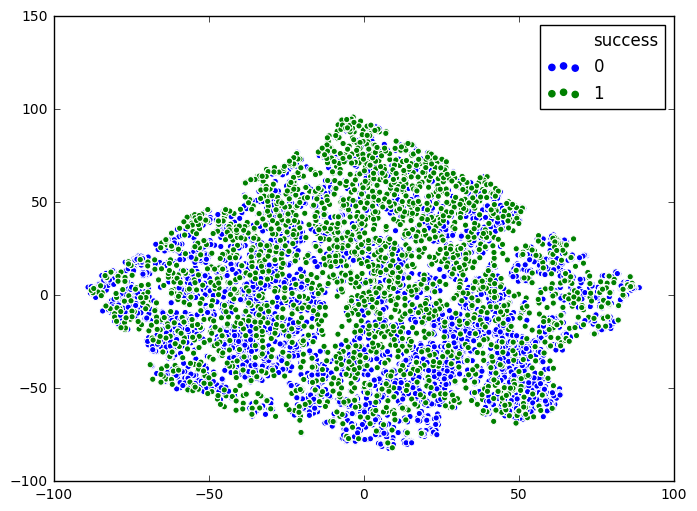

In [45]:
from sklearn import manifold
# Reduce dimension of data via t-TSNE algorithm
tsne = manifold.TSNE(n_components=2, init='random', random_state=0, perplexity=50)
reduced_data = tsne.fit_transform(x_train)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(reduced_data[:, 0], reduced_data[:, 1], hue=y_train);

In [54]:
#use unbalanced set
x_train, x_test, y_train, y_test = train_test_split(dff.drop('success',axis=1), 
                                                    dff['success'], test_size=0.30, 
                                                    random_state=12345)

In [58]:
logmodel = LogisticRegression(class_weight={1:0.49,0:0.51})
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      3306
           1       0.53      0.09      0.15       936

    accuracy                           0.78      4242
   macro avg       0.66      0.53      0.51      4242
weighted avg       0.73      0.78      0.72      4242



/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


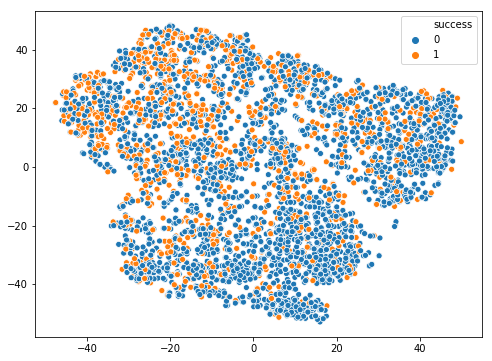

In [37]:
# Reduce dimension of data via t-TSNE algorithm
tsne = manifold.TSNE(n_components=2, init='random', random_state=0, perplexity=50)
reduced_data = tsne.fit_transform(x_train)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(reduced_data[:, 0], reduced_data[:, 1], hue=y_train);